# Useful Resources


### Library documentation and references
Comprehensive talib documentation with examples, math formulas, and source code  
http://tadoc.org/

Talib quickstart  
https://mrjbq7.github.io/ta-lib/func.html

Talib common functions library  
http://qtstalker.sourceforge.net/talib.html

Talib functions list  
https://www.ta-lib.org/function.html

Tsfresh time series feature extraction library github  
https://github.com/blue-yonder/tsfresh

Tslearn time series feature extraction library github  
https://github.com/rtavenar/tslearn


### Educational references

Time series classification with dynamic time warping (stack overflow version)  
https://stats.stackexchange.com/questions/66027/time-series-classification-very-poor-results

Time series classification with dynamic time warping  
http://alexminnaar.com/time-series-classification-and-clustering-with-python.html

Time series classifcation with TensorFlow  
https://burakhimmetoglu.com/2017/08/22/time-series-classification-with-tensorflow/

Time series classification methods  
https://www.quora.com/What-are-some-time-series-classification-methods


#### Some popular time series classification techniques
Hidden Markov Models  
Dynamic Time Warping  
Recurrent Neural Networks  
Dynamic Bayes Nets  
Constructive induction of temporal features  
Extracting prototype examples  
Applying relational learning techniques  



In [19]:
import pandas as pd
import numpy as np
import time
import datetime
import talib
from scipy import stats

In [20]:
def get_pricing_data(symbol_list):
    start = '2014-01-01'
    end = datetime.date.today()
    
    data = get_pricing(symbol_list,frequency='daily',
                       fields=['open_price','high','low','price','volume'],
                       start_date=start, end_date=end)
    return data

df1 = get_pricing_data(['NFLX'])

In [21]:
df1

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 1141 (major_axis) x 1 (minor_axis)
Items axis: open_price to volume
Major_axis axis: 2014-01-02 00:00:00+00:00 to 2018-07-13 00:00:00+00:00
Minor_axis axis: Equity(23709 [NFLX]) to Equity(23709 [NFLX])

In [22]:
# Retrieve price field data for first item in panel
#df1.iloc[:,:,0]['price']


#df1.iloc[:,:,0]['RSI_14'] = talib.RSI(df1.iloc[:,:,0]['price'],timeperiod=14)


#df1[:,:,i]['RSI_14'] = talib.RSI(df1.iloc[:,:]['price'],timeperiod=14)

In [23]:
nflx_df = df1.iloc[:,:,0]

In [24]:
nflx_df.head()

,open_price,high,low,price,volume
2014-01-02 00:00:00+00:00,52.402,52.512,51.544,51.858,1.019371e+07
2014-01-03 00:00:00+00:00,52.001,52.497,51.844,51.871,8.664630e+06
2014-01-06 00:00:00+00:00,51.891,52.045,50.477,51.344,1.186245e+07
2014-01-07 00:00:00+00:00,49.685,49.700,48.154,48.481,2.921363e+07
2014-01-08 00:00:00+00:00,48.105,49.427,48.075,48.715,1.613972e+07


# A brief review of slicing

In [25]:
df2 = [i for i in df1.iloc[:,:,:]]

In [26]:
df2

['open_price', 'high', 'low', 'price', 'volume']

In [27]:
df2[0]

'open_price'

In [28]:
df3 = pd.DataFrame(df1.iloc[:,:,0])

In [29]:
df3.head()

,open_price,high,low,price,volume
2014-01-02 00:00:00+00:00,52.402,52.512,51.544,51.858,1.019371e+07
2014-01-03 00:00:00+00:00,52.001,52.497,51.844,51.871,8.664630e+06
2014-01-06 00:00:00+00:00,51.891,52.045,50.477,51.344,1.186245e+07
2014-01-07 00:00:00+00:00,49.685,49.700,48.154,48.481,2.921363e+07
2014-01-08 00:00:00+00:00,48.105,49.427,48.075,48.715,1.613972e+07


In [30]:
def talib_indicators(df):
    
    df['AD'] = talib.AD(df['high'],df['low'],df['price'],df['volume'])
    df['ADOSC_3_10'] = talib.ADOSC(df['high'],df['low'],df['price'],df['volume'],
                              fastperiod=3,
                              slowperiod=10)
    df['ADX_14'] = talib.ADX(df['high'],df['low'],df['price'],timeperiod=14)
    df['ADXR_14'] = talib.ADXR(df['high'],df['low'],df['price'],timeperiod=14)
    df['APO_12_26'] = talib.APO(df['price'],fastperiod=12,
                               slowperiod=26,
                               matype=0)
    
    df['AROONOSC_14'] = talib.AROONOSC(df['high'],df['low'],timeperiod=14)
    df['OBV'] = talib.OBV(df['price'], df['volume'])
    df['MOM_30'] = talib.MOM(df['price'], timeperiod=30)
    df['MOM_open'] = talib.MOM(df['open_price'], timeperiod=30)
    df['MOM_30_high'] = talib.MOM(df['high'], timeperiod=30)
    df['MOM_30_low'] = talib.MOM(df['low'], timeperiod=30)
    df['HT_DCPERIOD'] = talib.HT_DCPERIOD(df['price'])
    df['CDLDOJI'] = talib.CDLDOJI(df['open_price'],df['high'],df['low'],df['price'])
    df['CDLDOJISTAR'] = talib.CDLDOJISTAR(df['open_price'],df['high'],df['low'],df['price'])
    df['ROC_20'] = talib.ROC(df['price'],timeperiod=20)
    
    # Stats functions
    df['close_organic_zscore'] = (df['price'] - df['price'].mean()/ df['price'].std(ddof=0))
    
    
    # Date related functions features
    df['DayOfWeek'] = df.index.dayofweek
    df['DayOfYear'] = df.index.dayofyear
    df['WeekOfYear'] = df.index.weekofyear
    
    return df

In [31]:
indicators_df = talib_indicators(df3)

In [32]:
indicators_df

,open_price,high,low,price,volume,AD,ADOSC_3_10,ADX_14,ADXR_14,APO_12_26,...,MOM_30_high,MOM_30_low,HT_DCPERIOD,CDLDOJI,CDLDOJISTAR,ROC_20,close_organic_zscore,DayOfWeek,DayOfYear,WeekOfYear
2014-01-02 00:00:00+00:00,52.402,52.512,51.544,51.858,1.019371e+07,-3.580437e+06,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,50.258043,3,2,1
2014-01-03 00:00:00+00:00,52.001,52.497,51.844,51.871,8.664630e+06,-1.152854e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,50.271043,4,3,1
2014-01-06 00:00:00+00:00,51.891,52.045,50.477,51.344,1.186245e+07,-1.027270e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,49.744043,0,6,2
2014-01-07 00:00:00+00:00,49.685,49.700,48.154,48.481,2.921363e+07,-2.712817e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,46.881043,1,7,2
2014-01-08 00:00:00+00:00,48.105,49.427,48.075,48.715,1.613972e+07,-2.798768e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,47.115043,2,8,2
2014-01-09 00:00:00+00:00,48.825,49.141,47.858,48.151,1.446081e+07,-3.584363e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,46.551043,3,9,2
2014-01-10 00:00:00+00:00,48.297,48.378,47.220,47.440,1.347827e+07,-4.420063e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,45.840043,4,10,2
2014-01-13 00:00:00+00:00,47.305,49.811,47.305,48.118,2.321258e+07,-5.235189e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,46.518043,0,13,3
2014-01-14 00:00:00+00:00,48.778,48.801,47.511,48.281,1.709005e+07,-4.903987e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,46.681043,1,14,3
2014-01-15 00:00:00+00:00,47.858,48.368,45.582,47.184,3.426719e+07,-4.389856e+07,-1.157100e+07,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,45.584043,2,15,3


In [33]:
indicators_df.shape

(1141, 24)

In [34]:
pd.isnull(indicators_df).sum()

open_price               1
high                     1
low                      1
price                    1
volume                   1
AD                       0
ADOSC_3_10               9
ADX_14                  28
ADXR_14                 41
APO_12_26               26
AROONOSC_14             14
OBV                      0
MOM_30                  31
MOM_open                31
MOM_30_high             31
MOM_30_low              31
HT_DCPERIOD             33
CDLDOJI                  0
CDLDOJISTAR              0
ROC_20                  21
close_organic_zscore     1
DayOfWeek                0
DayOfYear                0
WeekOfYear               0
dtype: int64

In [17]:
#pd.DataFrame.resample(df3,rule='3D',axis=0)

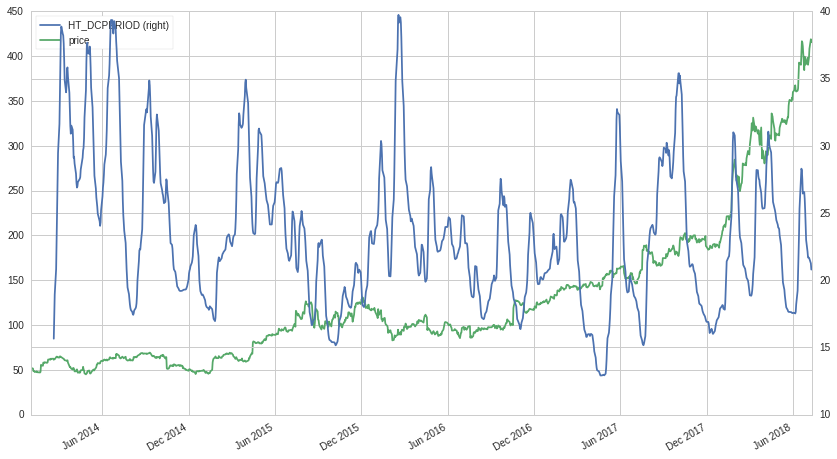

In [18]:
indicators_df['HT_DCPERIOD'].plot(secondary_y=True,legend=True)
indicators_df['price'].plot(legend=True)

In [160]:
df3.shape
pd.isnull(df3).sum()
len(df3['price'])

1130

In [161]:
len(df3.index)

1130

In [162]:
#df3_diff = np.diff(df3)
#df3_diff

#df3['price_diff'] = np.diff(df3['price'],n=1,axis=0)
#df3.fillna(value=9999999999999.00,axis=0,inplace=True)
price_s = pd.Series(df3['price'])
price_diff = np.diff(price_s)
chg_dvar = np.where(price_diff > 0,1,-1)
#df3['price_diff_dvar'] = np.where(df3['price_diff'] > 0,1,-1)

In [163]:
chg_dvar

array([ 1, -1, -1, ..., -1,  1, -1])

In [27]:
price_list = list(df3['price'])

In [29]:
price_list[:1]

[51.857999999999997]

In [38]:
df3['price'][-2:]

2018-06-26 00:00:00+00:00    399.42
2018-06-27 00:00:00+00:00       NaN
Freq: C, Name: price, dtype: float64

In [59]:
df3.head(1)

,open_price,high,low,price,volume,AD,ADOSC_3_10,ADX_14,ADXR_14,APO_12_26,AROONOSC_14,OBV
2014-01-02 00:00:00+00:00,52.402,52.512,51.544,51.858,1.019371e+07,-3.580437e+06,NaN,NaN,NaN,NaN,NaN,1.019371e+07


In [98]:
recent_prices = df3['price'].values
price_changes = np.diff(recent_prices).tolist()

recent_OBV = df3['OBV'].values
OBV_changes = np.diff(recent_OBV).tolist()

recent_AD = df3['AD'].values
AD_changes = np.diff(recent_AD).tolist()

In [82]:
history_range = 252
lookback_period = 126

X = []
Y = []

data_range = range(history_range - lookback_period-1)

for i in data_range:
    X.append(price_changes[i:i+lookback_period]) # Should store historical prices
    Y.append(price_changes[i+lookback_period]) # Should store recent prices

In [85]:
np.shape(data_range)

(125,)

In [86]:
np.shape(X)

(125, 126)

In [87]:
np.shape(Y)

(125,)

In [88]:
print(np.shape(df3['price']))
print(np.shape(recent_prices))

(1130,)
(1130,)


In [102]:
history_range = 252
lookback_period = 126

X = []
Y = []

data_range = range(history_range - lookback_period-1)

for i in data_range:
    X.append(price_changes[i:i+lookback_period] + recent_OBV[i:i+lookback_period] + recent_AD[i:i+lookback_period]) # Should store historical prices
    Y.append(price_changes[i+lookback_period]) # Should store recent prices

In [103]:
np.shape(X)

(125, 126)

In [104]:
np.shape(Y)

(125,)

In [129]:
df3[['price','OBV']].shape

(1130, 2)

In [146]:
df4 = pd.DataFrame(df3)
#df4.index = pd.DatetimeIndex(df4.index)

In [147]:
type(df4.index)

<class 'pandas.tseries.index.DatetimeIndex'>

In [148]:
def create_date_features(df):
    df['BQuarterBegin'] = pd.datetools.BQuarterBegin(df.index)
    df['BQuarterEnd'] = pd.datetools.BQuarterEnd(df.index)
    
    
    return df

In [149]:
df5 = create_date_features(df4)

In [150]:
#df5

In [151]:
#df4